In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import gridspec
import mds
import xarray as xr
import xmitgcm
import seaborn as sns
import cmocean
import sys
import os
from IPython import display
import time


In [2]:
import cartopy as cart
from scipy.interpolate import griddata
from scipy.interpolate import interp2d


In [3]:
plt.rcParams.update({'font.size': 16
    , 'legend.markerscale': 1., 'axes.titlesize': 16, 'axes.labelsize' : 12,
      'legend.fontsize' : 14,'legend.handlelength': 3})

plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)

color2 = '#6495ed'
color1 = '#ff6347'
color5 = '#8470ff'
color3 = '#3cb371'
color4 = '#ffd700'
color6 = '#ba55d3'
plt.rcParams.update({'figure.figsize' : (15,6)})


In [4]:

dir_ll1815 = '/central/groups/oceanphysics/anirban/ll181502/grid_ll1815/'
dir_bathy = '/central/groups/oceanphysics/anirban/NA/inputfiles/NA_2160/NA_2160/input_ll1815/'

dir_ll2160 = '/central/groups/oceanphysics/anirban/NA/experiments/run_old/run_ll2160_05/'
dir_bathy2160 = '/central/groups/oceanphysics/anirban/NA/inputfiles/NA_2160/NA_2160/input_ll/'



In [5]:
bathy = np.fromfile(open(dir_bathy+'bathy.bin', 'rb'), '>f4')
bathy.shape = (532,1815)
bathy.shape

(532, 1815)

In [6]:
bathy2160 = np.fromfile(open(dir_bathy2160+'bathy.bin', 'rb'), '>f4')
bathy2160.shape = (540,2160)
bathy2160.shape

(540, 2160)

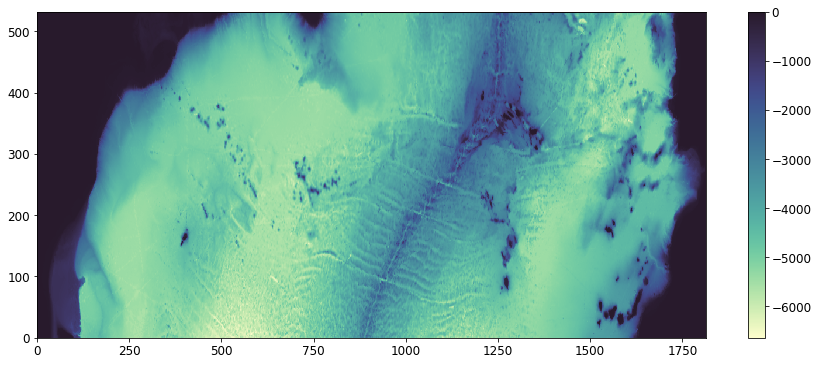

In [7]:
plt.pcolormesh(bathy, cmap=cmocean.cm.deep);plt.colorbar()

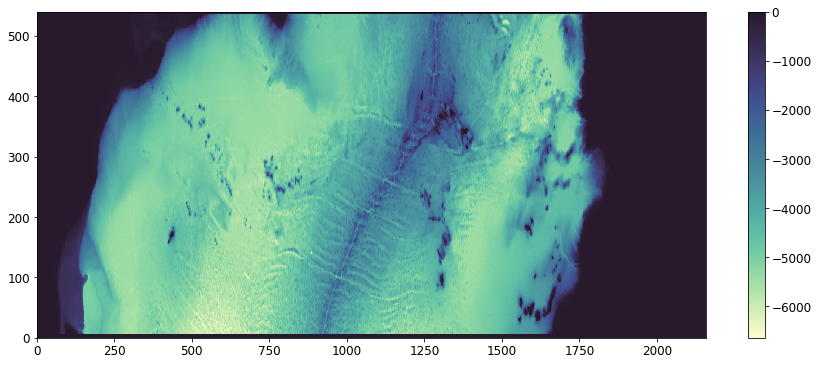

In [8]:
plt.pcolormesh(bathy2160, cmap=cmocean.cm.deep);plt.colorbar()

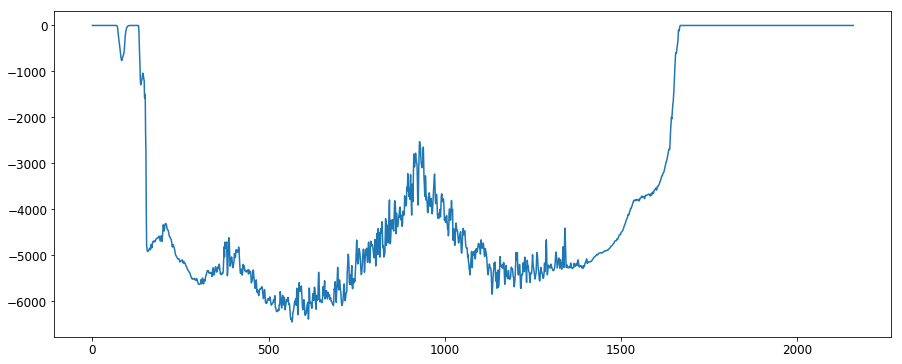

In [9]:
plt.plot(bathy2160[8])

In [10]:
ds_ll1815 = xmitgcm.open_mdsdataset(dir_ll1815,iters=None,default_dtype='>f4')
ds_ll1815

/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/xmitgcm-0.2.2-py3.6.egg/xmitgcm/mds_store.py:807: UserWarning: Couldn't find available_diagnostics.log in /central/groups/oceanphysics/anirban/ll181502/grid_ll1815/. Using default version.
  "in %s. Using default version." % data_dir)


<xarray.Dataset>
Dimensions:  (XC: 1815, XG: 1815, YC: 532, YG: 532, Z: 100, Zl: 100, Zp1: 101, Zu: 100)
Coordinates:
  * XC       (XC) >f4 -81.5625 -81.520836 -81.47917 ... -6.020836 -5.9791694
  * YC       (YC) >f4 26.87238 26.906544 26.9407 ... 43.428173 43.456318
  * XG       (XG) >f4 -81.583336 -81.54167 -81.5 ... -6.0416694 -6.0000024
  * YG       (YG) >f4 26.855293 26.889463 26.923624 ... 43.414097 43.44225
  * Z        (Z) >f4 -2.5 -7.5 -12.5 -17.5 ... -5568.185 -5790.69 -6018.94
  * Zp1      (Zp1) >f4 0.0 -5.0 -10.0 -15.0 ... -5678.0 -5903.38 -6134.5
  * Zu       (Zu) >f4 -5.0 -10.0 -15.0 -20.0 ... -5678.0 -5903.38 -6134.5
  * Zl       (Zl) >f4 0.0 -5.0 -10.0 -15.0 ... -5244.5 -5458.37 -5678.0 -5903.38
    rA       (YC, XC) >f4 dask.array<shape=(532, 1815), chunksize=(532, 1815)>
    dxG      (YG, XC) >f4 dask.array<shape=(532, 1815), chunksize=(532, 1815)>
    dyG      (YC, XG) >f4 dask.array<shape=(532, 1815), chunksize=(532, 1815)>
    Depth    (YC, XC) >f4 dask.array<shape

In [11]:
ds_ll2160 = xmitgcm.open_mdsdataset(dir_ll2160,iters=None,default_dtype='>f4')
ds_ll2160

<xarray.Dataset>
Dimensions:  (XC: 2160, XG: 2160, YC: 540, YG: 540, Z: 100, Zl: 100, Zp1: 101, Zu: 100)
Coordinates:
  * XC       (XC) >f4 -82.979164 -82.9375 -82.895836 ... 6.9375 6.9791665
  * YC       (YC) >f4 26.667171 26.701397 26.735615 ... 43.48445 43.51257
  * XG       (XG) >f4 -83.0 -82.958336 -82.916664 ... 6.875 6.9166665 6.9583335
  * YG       (YG) >f4 26.650055 26.684286 26.718508 ... 43.470387 43.498512
  * Z        (Z) >f4 -2.5 -7.5 -12.5 -17.5 ... -5568.185 -5790.69 -6018.94
  * Zp1      (Zp1) >f4 0.0 -5.0 -10.0 -15.0 ... -5678.0 -5903.38 -6134.5
  * Zu       (Zu) >f4 -5.0 -10.0 -15.0 -20.0 ... -5678.0 -5903.38 -6134.5
  * Zl       (Zl) >f4 0.0 -5.0 -10.0 -15.0 ... -5244.5 -5458.37 -5678.0 -5903.38
    rA       (YC, XC) >f4 dask.array<shape=(540, 2160), chunksize=(540, 2160)>
    dxG      (YG, XC) >f4 dask.array<shape=(540, 2160), chunksize=(540, 2160)>
    dyG      (YC, XG) >f4 dask.array<shape=(540, 2160), chunksize=(540, 2160)>
    Depth    (YC, XC) >f4 dask.array<s

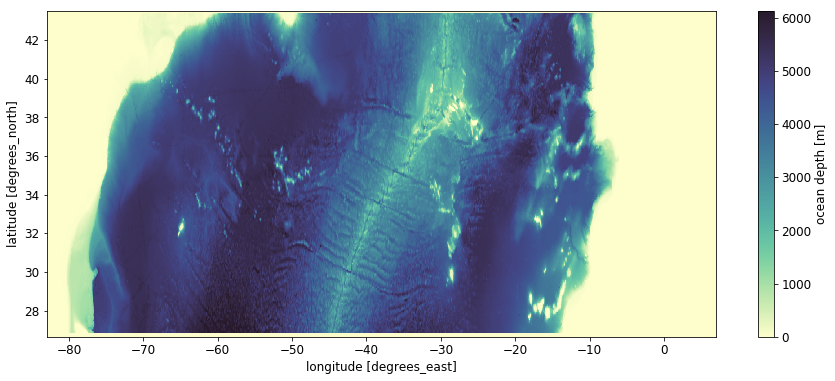

In [12]:
ds_ll2160.Depth.plot(cmap=cmocean.cm.deep)

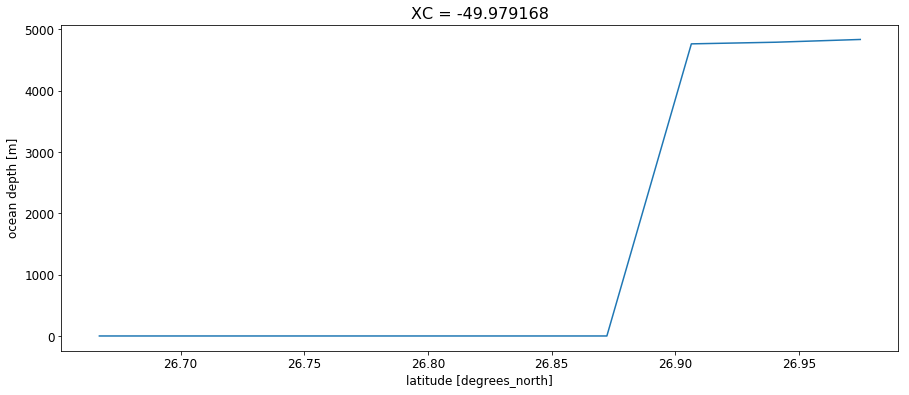

In [13]:
ds_ll2160.Depth.sel(XC=-50, method='nearest').isel(YC=slice(0,10)).plot()

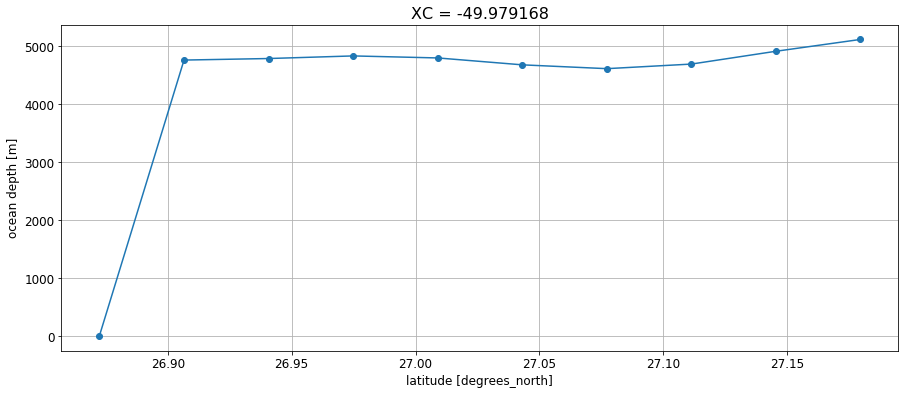

In [14]:
ds_ll1815.Depth.sel(XC=-50, method='nearest').isel(YC=slice(0,10)).plot(marker='o')
plt.grid()

In [15]:
ds_ll1815.YC

<xarray.DataArray 'YC' (YC: 532)>
array([26.87238 , 26.906544, 26.9407  , ..., 43.400017, 43.428173, 43.456318],
      dtype=float32)
Coordinates:
  * YC       (YC) >f4 26.87238 26.906544 26.9407 ... 43.428173 43.456318
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north
    coordinate:     YC XC
    axis:           Y

In [16]:
dir910 = '/central/groups/oceanphysics/anirban/NA/experiments/ll910_01/inputfiles/'
bathy910 = np.fromfile(open(dir910+'bathy.bin', 'rb'), '>f4')
bathy910.shape = (266, 910)
bathy910.shape

(266, 910)

In [17]:
plt.pcolormesh(bathy910, cmap=cmocean.cm.deep)

In [18]:
dely2160 = np.fromfile(open(dir_bathy2160+'delYFile', 'rb'), '>f4')
dely1815 = np.fromfile(open(dir_bathy+'delYFile', 'rb'), '>f4')
dely910 = np.fromfile(open(dir910+'delYFile', 'rb'), '>f4')

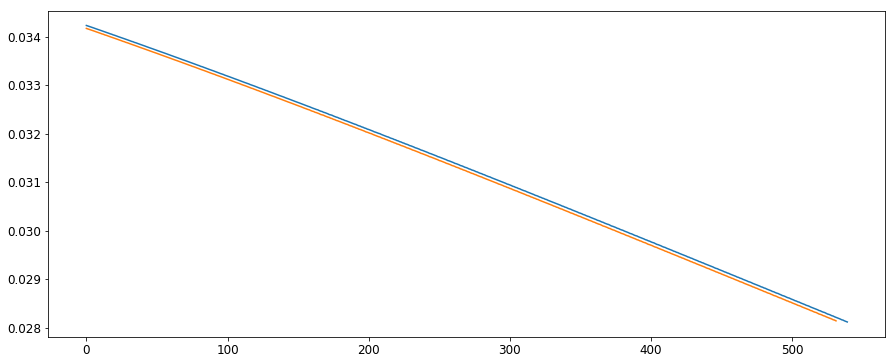

In [19]:
plt.plot(dely2160)
plt.plot(dely1815)
#plt.plot(dely910[10:20], 'o-')

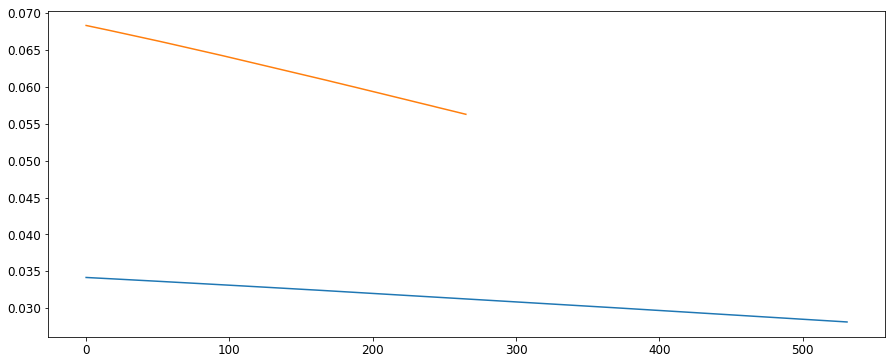

In [20]:
plt.plot(dely1815)
plt.plot(dely910)


In [21]:
dir4320 = '/central/groups/oceanphysics/anirban/'
bath4320 = np.fromfile(open(dir4320+'bathy4320_r4', 'rb'), '>f4')

In [23]:
bath4320.shape = (13,4320,4320)
bath4320.shape

(13, 4320, 4320)

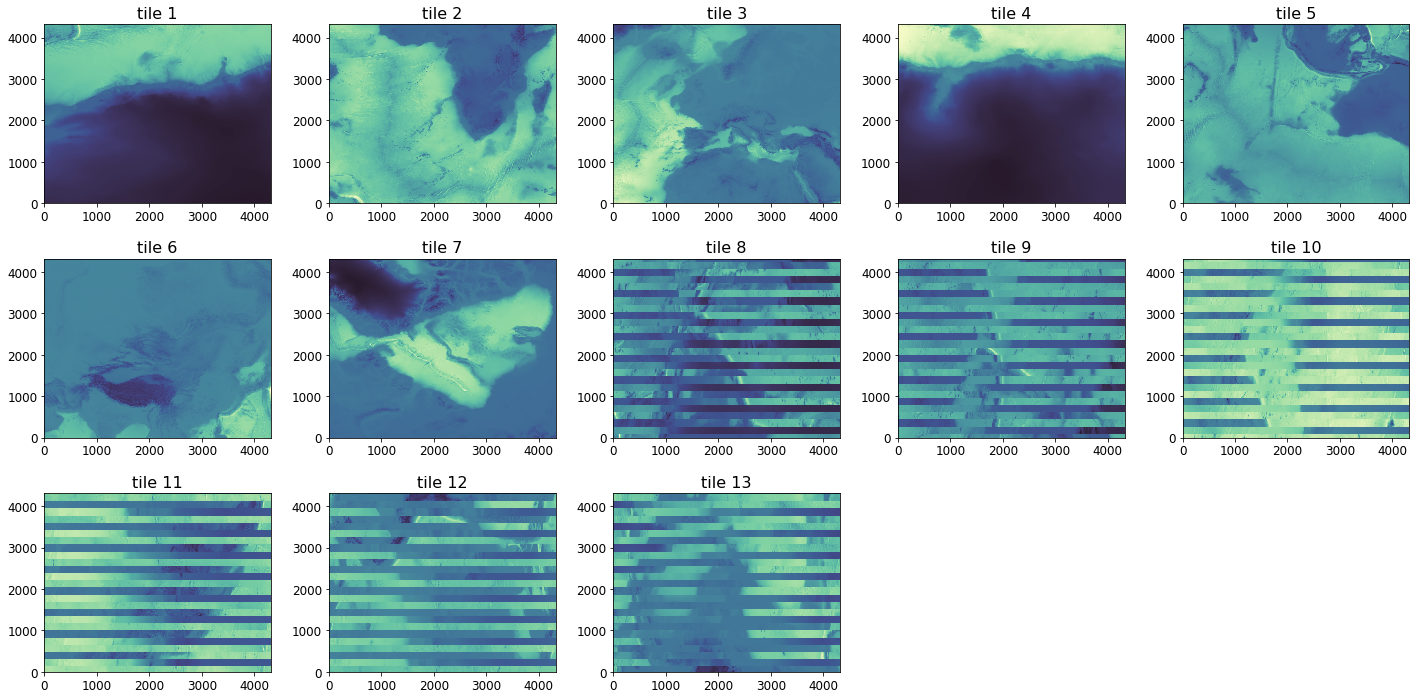

In [24]:
fig = plt.figure(figsize=(20,10))
for i in range(13):
    plt.subplot(3,5,i+1)
    plt.pcolormesh(bath4320[i], cmap=cmocean.cm.deep)
    plt.title('tile %s' %(i+1))
    plt.tight_layout()

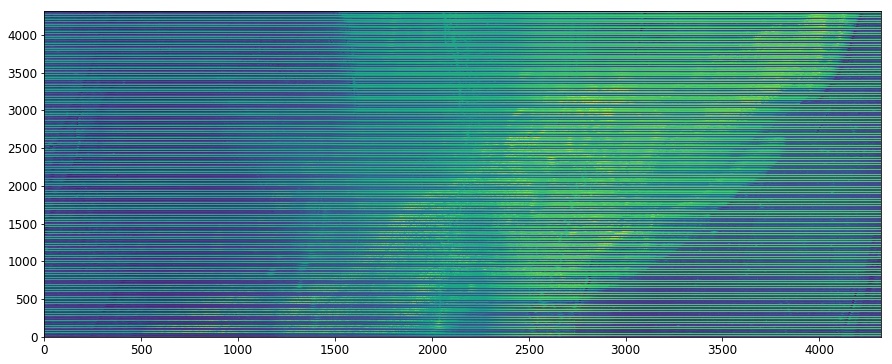

In [26]:
tile11 = bath4320[10]
plt.pcolormesh(tile11)

In [29]:
plt.plot(tile11.ravel()[0:8640])

In [32]:
plt.pcolormesh(tile11[0:10,0:10])

In [36]:
bathy910[:,-3]=0
bathy910[:,-2]=0


In [42]:
outdir = '/central/groups/oceanphysics/anirban/NA/experiments/ll910_01/inputfiles/'

In [43]:
def output_binary_file(data, fname, dtype=np.dtype('>f4')):
    data.astype(dtype).tofile(fname)

In [44]:
output_binary_file(bathy910, os.path.join(outdir, 'bathy_new.bin'))

In [3]:
dir_llc4320 = '/central/groups/oceanphysics/anirban/llc4320_grid'  
ds_llc4320 =  xmitgcm.open_mdsdataset(dir_llc4320,iters=None,geometry='llc',default_dtype='>f4')

/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/xmitgcm-0.2.2-py3.6.egg/xmitgcm/mds_store.py:807: UserWarning: Couldn't find available_diagnostics.log in /central/groups/oceanphysics/anirban/llc4320_grid. Using default version.
  "in %s. Using default version." % data_dir)


In [46]:
ds_llc4320

<xarray.Dataset>
Dimensions:  (face: 13, i: 4320, i_g: 4320, j: 4320, j_g: 4320, k: 90, k_l: 90, k_p1: 91, k_u: 90)
Coordinates:
  * i        (i) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * j        (j) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * k_u      (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k_l      (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k_p1     (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89 90
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    XC       (face, j, i) >f4 dask.array<shape=(13, 4320, 4320), chunksize=(1, 4320, 4320)>
    YC       (face, j, i) >f4 dask.array<shape=(13, 4320, 4320), chunksize=(1, 4320, 4320)

In [ ]:
ds_llc4320.YC.min().values

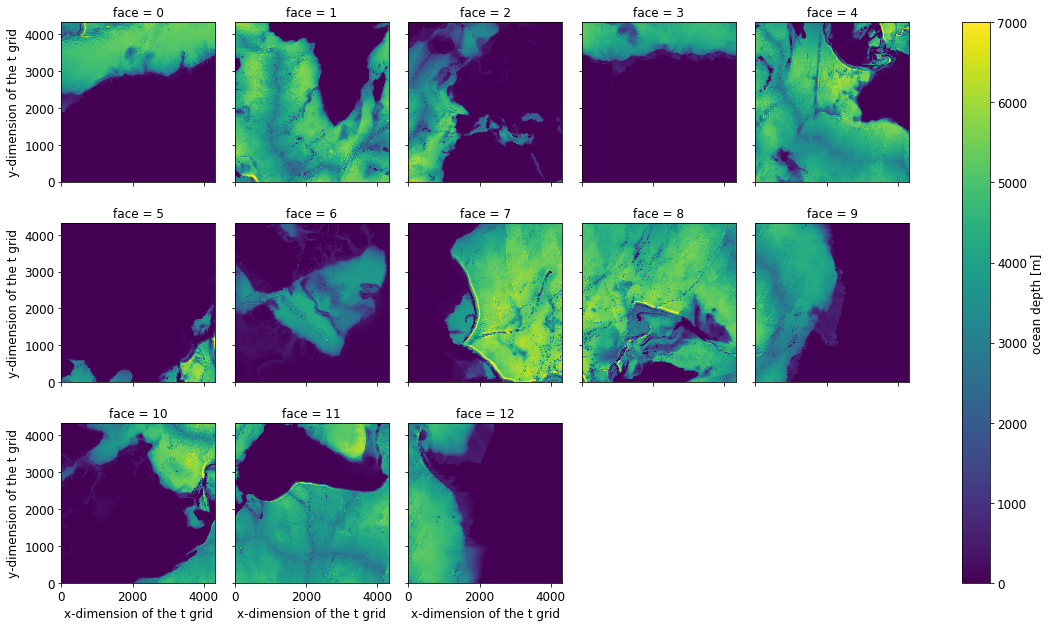

In [49]:
ds_llc4320.Depth.plot(col='face', col_wrap=5)

In [50]:
depthfull = np.zeros((4320,8640))
depthfull[:,0:4320] = np.rot90(ds_llc4320.Depth.sel(face=10).values)
depthfull[:,4320:8640] = ds_llc4320.Depth.sel(face=2).values

In [51]:
XCfull = np.zeros((4320,8640))
XCfull[:,0:4320] = np.rot90(ds_llc4320.XC.sel(face=10).values)
XCfull[:,4320:8640] = ds_llc4320.XC.sel(face=2).values

YCfull = np.zeros((4320,8640))
YCfull[:,0:4320] = np.rot90(ds_llc4320.YC.sel(face=10).values)
YCfull[:,4320:8640] = ds_llc4320.YC.sel(face=2).values

XGfull = np.zeros((4320,8640))
XGfull[:,0:4320] = np.rot90(ds_llc4320.XG.sel(face=10).values)
XGfull[:,4320:8640] = ds_llc4320.XG.sel(face=2).values

YGfull = np.zeros((4320,8640))
YGfull[:,0:4320] = np.rot90(ds_llc4320.YG.sel(face=10).values)
YGfull[:,4320:8640] = ds_llc4320.YG.sel(face=2).values


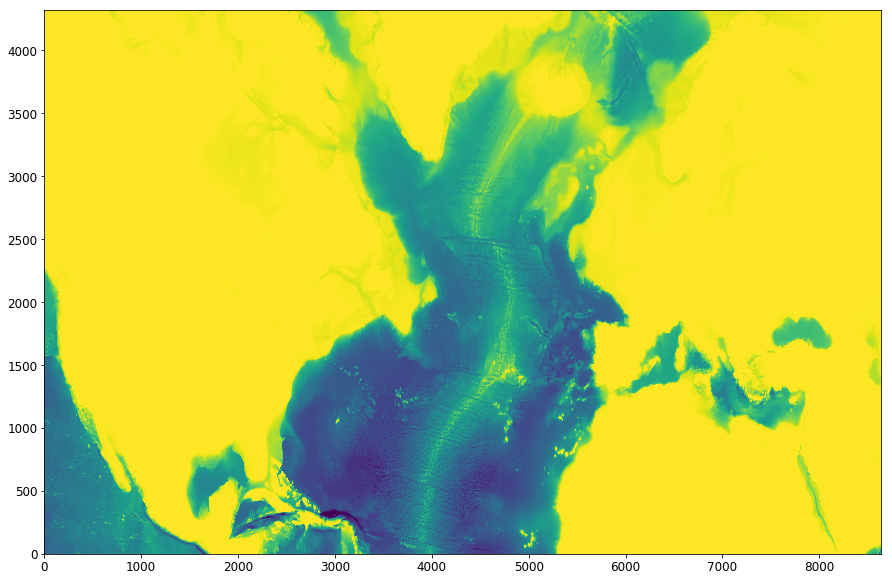

In [52]:
plt.figure(figsize=(15,10))
plt.pcolormesh(depthfull*-1)

In [53]:
fold = open('/central/groups/oceanphysics/anirban/NA/inputfiles/NA_2160/NA_2160/input_ll1815/delYFile', 'rb')
delYold1815 = np.fromfile(fold, '>f4')
delYold1815.shape

(532,)

In [58]:
idy = (np.where((YGfull[:,900]>=26.855293273925781) & (YGfull[:,900]<np.sum(delYold1815)+ 26.855293273925781))[0])
YGsmall=YGfull[idy,:]
YCsmall=YCfull[idy,:]

In [59]:
idx = (np.where((XGfull[2,:]>=-81.583335876464844) & (XGfull[2,:]<-81.583335876464844+0.041666666666667*1815))[0])
XGsmall=XGfull[:,idx]
XCsmall=XCfull[:,idx]

In [60]:
bathysmall = depthfull[idy][:,idx]*-1

In [61]:
x = XCsmall[idy]
y = YCsmall[:,idx]
x.shape, y.shape

((1064, 3630), (1064, 3630))

In [62]:
bathysmall.shape

(1064, 3630)

In [65]:
x.min(), x.max(), y.min(), y.max()

(-81.57291412353516, -5.96875, 26.84674835205078, 43.449283599853516)

In [66]:
ds_ll1815.XC.min(), ds_ll1815.XC.max(), ds_ll1815.YC.min(), ds_ll1815.YC.max(), 

(<xarray.DataArray 'XC' ()>
 array(-81.5625, dtype=float32), <xarray.DataArray 'XC' ()>
 array(-5.979169, dtype=float32), <xarray.DataArray 'YC' ()>
 array(26.87238, dtype=float32), <xarray.DataArray 'YC' ()>
 array(43.456318, dtype=float32))

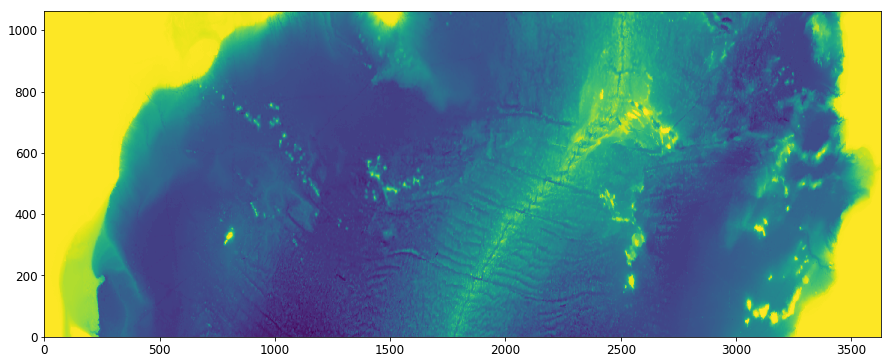

In [67]:
plt.pcolormesh(bathysmall)

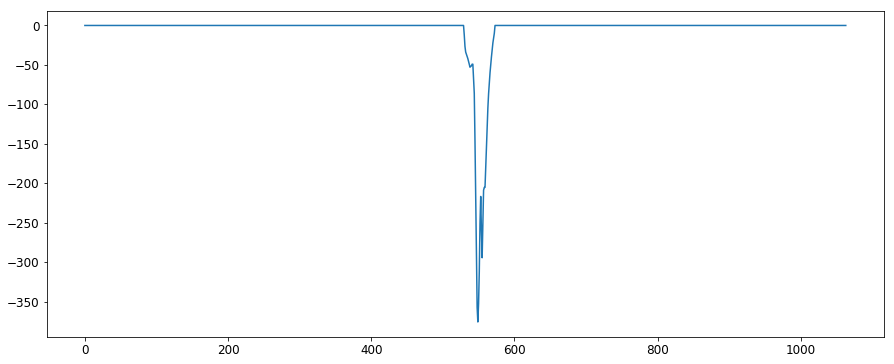

In [77]:
plt.plot(bathysmall[:,-5])

In [99]:
x[:,-2]

array([-5.98958349, -5.98958349, -5.98958349, ..., -5.98958349,
       -5.98958349, -5.98958349])

In [79]:
bathy_4320 = bathysmall
bathy_4320[0]=0
bathy_4320[-1]=0
bathy_4320[:,-1]=0
bathy_4320[:,-2]=0


In [82]:
def output_binary_file(data, fname, dtype=np.dtype('>f4')):
    data.astype(dtype).tofile(fname)

In [83]:
outdir = '/central/groups/oceanphysics/anirban/NA/experiments/ll3630/inputfiles/'

In [84]:
output_binary_file(bathy_4320, os.path.join(outdir, 'bathy.bin'))

In [86]:
from scipy.interpolate import interp1d

In [89]:
y1 = y[:,300]

y0 = ds_ll1815.YC.values
y1.shape, y0.shape

((1064,), (532,))

In [90]:
dely1815.shape

(532,)

In [93]:
f_dely = interp1d(y0, dely1815, kind='linear', fill_value='extrapolate')
dely_3630 = f_dely(y1)

In [95]:
dely3630= dely_3630/2.

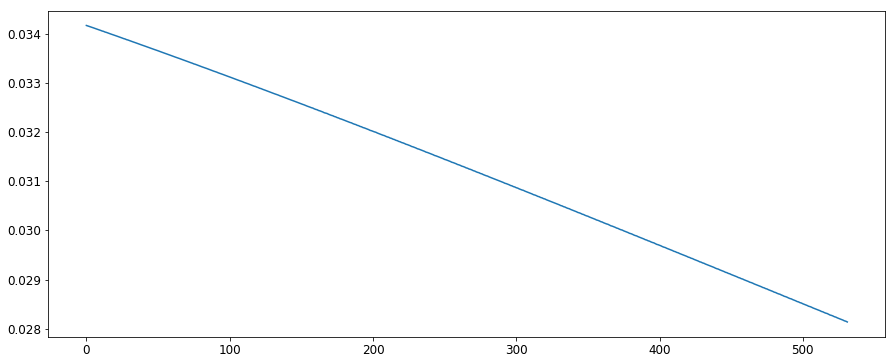

In [97]:
plt.plot(dely1815)

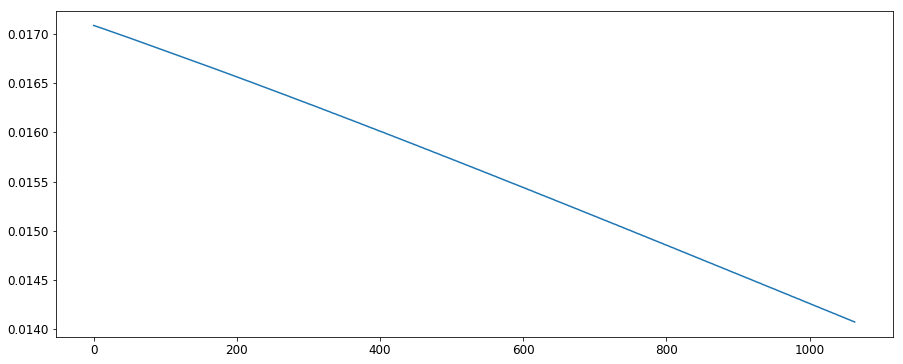

In [96]:
plt.plot(dely3630)

In [98]:
output_binary_file(dely3630, os.path.join(outdir, 'delYFile'))

In [ ]:
cd..